# 01 Creation of an EPR pair


The goal of this Jupyter notebook is to help memorize the basic steps of writing quantum algorithms in Qiskit. We want to create an [EPR (Einstein, Podolsky, Rosen) pair](https://en.wikipedia.org/wiki/Bell_state); a pair of qubits that are maximally [**entangled**](https://en.wikipedia.org/wiki/Quantum_entanglement). More specifically, we'll build the following circuit: 

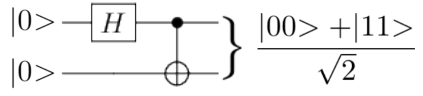

Remember, that the controlled NOT (CNOT) gate will do nothing if the control qubit (marked with $\bullet$) is 0 and will flip the target qubit (marked with $\oplus$), if the control qubit is 1.

CNOT is the default entangling gate. In the above circuit it forces the second qubit to have same value as the first qubit, creating a maximally entangled state; an EPR pair.

Complete the parts marked with "XXX" as we go through the same steps as in the previous notebook to build and execute this circuit.

## First step: Define a circuit

Complete the following cell to import the [`QuantumCircuit`](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit) object from `qiskit`:

In [1]:
from qiskit import QuantumCircuit

To prepare an EPR pair, we require two qubits. Furthermore, we want to store the result of the circuit execution in a classical bit. 

Complete the following cell, by defining a circuit consisting of two qubit and two classical bit, and add name to your ciruit:

/home/ljerome/anaconda3/envs/cocos/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


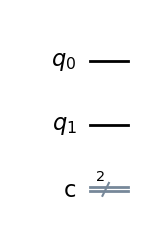

In [11]:
qc = QuantumCircuit(2,2, name='EPR pair')
qc.draw('mpl')

## Second step: Applying gates

Now, we can access our qubits by using the index of the quantum register.

To create our EPR pair, we simply need to apply the appropriate gates:
+ a Hadamard gate (H)
+ a controlled NOT gate (CNOT)

The Hadamard gate is of [**arity**](https://en.wikipedia.org/wiki/Arity) 1 since it affects one qubit. 

Complete the following cell to apply the Hadamard gate on the first qubit in the register of our program:

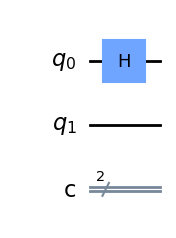

In [12]:
qc.h(0)
qc.draw("mpl")

Once we have applied the Hadamard gate, we can apply the controlled NOT gate.

A CNOT gate affects two qubits, so it is a gate of arity 2.

For conditional two-qubit gates we need to specify
+ first the **control qubit**, whose state will decide the function of the gate
+ then the second qubit which will be affected by the gate

Complete the cell below:

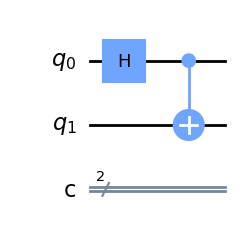

In [13]:
qc.cx(0, 1)
qc.draw('mpl')

We now have assembled the circuit preparing the EPR pair.

Next, we are going to execute the circuit on a simulator to study its behaviour.

## Third step: Printing information about the circuit

An important metric of quantum circuits is the **circuit depth**. The circuit depth is the longest sequence of quantum gates in a circuit that need to be executed sequentially.
Since the qubits have a limited lifetime, called **decoherence time**, and each circuit gate has a fixed length, the circuit depth is crucial for estimating whether a circuit can be executed on a real device.

Study the Qiskit docs for the [`QuantumCircuit`](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit) class and print import metadata such as number of qubits and classical bits and circuit depth. 

In [14]:
print("Circuit depth: ", qc.depth())
print("Number of qubits: ", qc.num_qubits)
print("Number of classical bits: ", qc.num_clbits)

Circuit depth:  2
Number of qubits:  2
Number of classical bits:  2


## Fourth step: Executing the circuit on a simulator and visualizing the results

### Full distribution

The steps we have done before gave us a circuit. Next, we want to simulate the circuit on our computer using an instance of Qiskit's `Aer` simulator.

To do so we first need to:
1. Import the `Aer` simulator 
2. Retrieve a simulator backend
3. Submit our quantum circuit to the backend. 

In [15]:
from qiskit import Aer

backend_simulator = Aer.get_backend('statevector_simulator')

Be aware that `Aer` supports different simulation methods and that it is also possible to perform noisy simulation which mimics the noise on a real device.

Above, we used the `statevector_simulator` method, which represents the initial state $|00\rangle$ as the vector $[1,0,0,0]^T$ and simulates the circuit by applying matrix-vector multiplications to the state for each gate in the circuit. For an overview of available methods refer to the Qiskit Aer [documentation](https://qiskit.github.io/qiskit-aer/tutorials/1_aersimulator.html#Simulation-Method-Option).

We can now submit the quantum circuit to our simulator.

To do so we need to use the [`run`](https://qiskit.github.io/qiskit-aer/stubs/qiskit_aer.StatevectorSimulator.html#qiskit_aer.StatevectorSimulator.run) method of our simulator and pass our circuit as a parameter:

In [16]:
job = backend_simulator.run(qc)
result = job.result()

We can now print the results, for example like so:

In [17]:
psi = result.get_statevector()
print("Statevectors after simulation: ", psi)

Statevectors after simulation:  Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


Finally, we can print the statevectors using LaTex, verifying that we obtained the state shown at the beginning of the notebook.

In [18]:
display(psi.draw(output='latex'))

<IPython.core.display.Latex object>

This result tells us, that we can expect to measure the state $|00\rangle$ with the same probability as the state $|11\rangle$. Measuring other states such as $|01\rangle$ or $|10\rangle$ is impossible in an ideal, noiseless scenario.

### Measurement  emulation

In a real device, we cannot directly measure the statevector. Instead, we execute the same circuit repeatedly and use the measurement outcomes to estimate the true statevector statistically. The number of circuit executions is referred to as **shots**.

So far, we have not added any measurement operations to our circuit. Append measurements for the first and second qubit to your circuit:

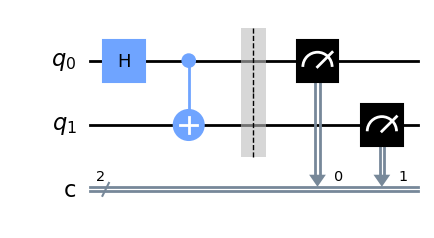

In [19]:
qc.measure_all(add_bits=False)
qc.draw('mpl')

To emulate a real QPU, we can emply a shot based execution of our simulator. To do so you need to pass the `shots` option to the backend `run` function. For example:

In [20]:
job = backend_simulator.run(qc, shots=100)

And now print the results:

In [21]:
result = job.result()
result.get_counts()

{'00': 54, '11': 46}

As we can see, the counts are not equally distributed between measuring $|00\rangle$ and $|11\rangle$. This is because we only made a crude approximation of the true state probabilities.

To obtain a better estimate, the number of shots need to be increased (try it!). In practical applications the required number of shots depend on many factors such as algorithm employed or device noise.

It is also possible to obtain the raw samples from the backend without aggregating the results by using the option `memory=True`

In [ ]:
job = backend_simulator.run(qc, shots=100, memory=True)
result = job.result()

In [23]:
print("Measured states:")
result.get_memory()

Measured states:


['11',
 '00',
 '00',
 '00',
 '00',
 '11',
 '00',
 '11',
 '11',
 '00',
 '00',
 '00',
 '00',
 '11',
 '00',
 '00',
 '11',
 '11',
 '00',
 '11',
 '11',
 '00',
 '11',
 '00',
 '11',
 '00',
 '11',
 '11',
 '00',
 '00',
 '11',
 '00',
 '00',
 '11',
 '00',
 '11',
 '00',
 '11',
 '11',
 '11',
 '00',
 '11',
 '00',
 '00',
 '00',
 '00',
 '11',
 '00',
 '00',
 '11',
 '00',
 '00',
 '00',
 '11',
 '00',
 '00',
 '11',
 '11',
 '11',
 '11',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '11',
 '11',
 '00',
 '11',
 '00',
 '11',
 '11',
 '11',
 '11',
 '00',
 '00',
 '11',
 '00',
 '00',
 '11',
 '11',
 '11',
 '00',
 '00',
 '00',
 '11',
 '11',
 '11',
 '11',
 '11',
 '00',
 '11',
 '00',
 '11',
 '00',
 '11',
 '00']

As you can see, the information we are getting are the raw shot results, which are the states observed in each measurement.

## Takeaway
Recap of how to:
+ Create a quantum circuit
+ Allocate qubits and classical bits to the circuit
+ Apply quantum gates
+ Instantiate Qiskit's `Aer` quantum simulator
+ Obtain the state vector (full distribution) of a circuit
+ Emulate shot-based measurements